In [1]:
"""
I had to pull my trapezoid integrator out of scipy so that it can be used more flexibely (on part of a series instead of just one value)
I also wanted to be able to compile this with numba
"""

'\nI had to pull my trapezoid integrator out of scipy so that it can be used more flexibely (on part of a series instead of just one value)\nI also wanted to be able to compile this with numba\n'

In [2]:
import numpy as np

In [3]:
def tupleset(t, i, value):
    l = list(t)
    l[i] = value
    return tuple(l)




def cumTrapz(y, x=None, dx=1.0, axis=-1, initial=None):
    y = np.asarray(y)
    if x is None:
        d = dx
    else:
        x = np.asarray(x)
        if x.ndim == 1:
            d = np.diff(x)
            # reshape to correct shape
            shape = [1] * y.ndim
            shape[axis] = -1
            d = d.reshape(shape)
        elif len(x.shape) != len(y.shape):
            raise ValueError("If given, shape of x must be 1-D or the "
                             "same as y.")
        else:
            d = np.diff(x, axis=axis)

        if d.shape[axis] != y.shape[axis] - 1:
            raise ValueError("If given, length of x along axis must be the "
                             "same as y.")

    nd = len(y.shape)
    slice1 = tupleset((slice(None),)*nd, axis, slice(1, None))
    slice2 = tupleset((slice(None),)*nd, axis, slice(None, -1))
    res = np.cumsum(d * (y[slice1] + y[slice2]) / 2.0, axis=axis)

    if initial is not None:
        if not np.isscalar(initial):
            raise ValueError("`initial` parameter should be a scalar.")

        shape = list(res.shape)
        shape[axis] = 1
        res = np.concatenate([np.full(shape, initial, dtype=res.dtype), res],
                             axis=axis)

    return res

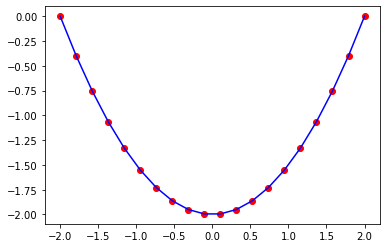

In [4]:
#plotting trapezoid integration from scipy
from scipy import integrate
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, num=20)
y = x
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
plt.show()

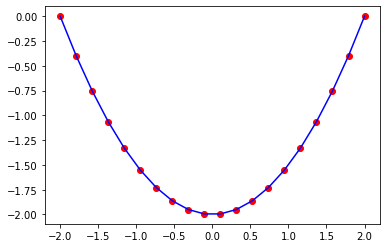

In [5]:
#plotting the trapezoid I just stole from scipy

x = np.linspace(-2, 2, num=20)
y = x
y_int = cumTrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
plt.show()

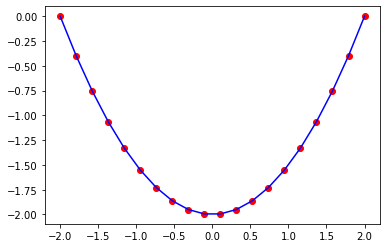

In [5]:
#now try the same thing except have youre data appear to be chunked (as it will when you integrate for your codes)

x = np.linspace(-2, 2, num=20)
y = x
y = np.split(y,2)
x = np.split(x,2)
y_int = []
for i in range(len(x)):
    
y_int = cumTrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
plt.show()